# 2021723 - ZAIN NOFAL

Preprocessing

In [22]:
import nltk
import ssl
import pandas as pd

# Bypass SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# Specify NLTK data path
nltk.data.path.append("/Users/zainnofal/nltk_data")

# Download NLTK resources ignoring SSL verification
nltk.download('punkt', download_dir="/Users/zainnofal/nltk_data", quiet=True, raise_on_error=False)
nltk.download('stopwords', download_dir="/Users/zainnofal/nltk_data", quiet=True, raise_on_error=False)

# Read the dataset
df = pd.read_csv("tweet_emotions.csv")


In [23]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re


# Define preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    
    # Removing special characters, URLs, and stopwords
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens if not token.startswith('http')]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return ' '.join(tokens)


In [24]:
# Apply preprocessing to the 'content' column
df['content'] = df['content'].apply(preprocess_text)

In [25]:
df.head()
bertdf=df.copy()

In [26]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylu know listenin bad habit earlier sta...
1,1956967666,sadness,layin n bed headach ughhhh waitin call
2,1956967696,sadness,funer ceremoni gloomi friday
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,dannycastillo want trade someon houston ticke...


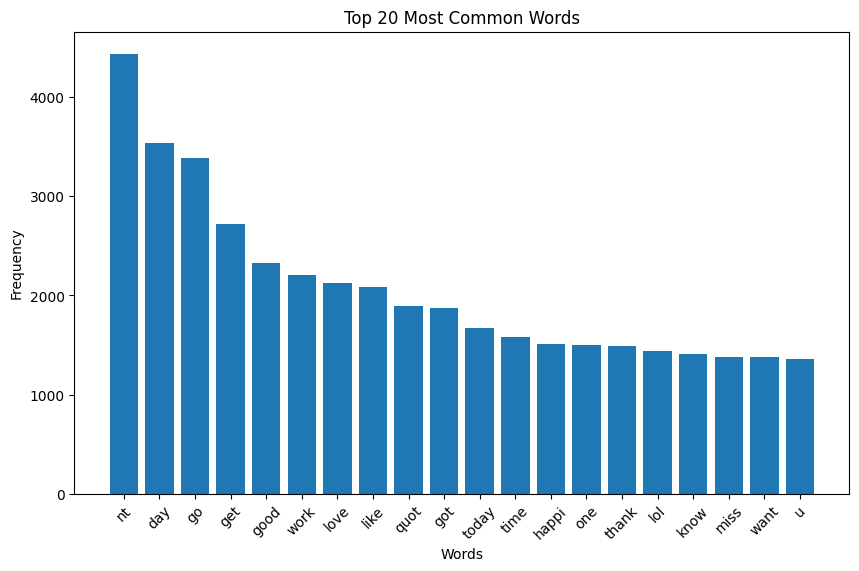

In [27]:
import matplotlib.pyplot as plt
from collections import Counter

# Tokenize the preprocessed text and flatten into a list of tokens
tokens = df['content'].str.split().sum()

# Count the frequency of each token
word_freq = Counter(tokens)

# Create a bar plot to visualize the top 20 most common words
top_words = word_freq.most_common(20)
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


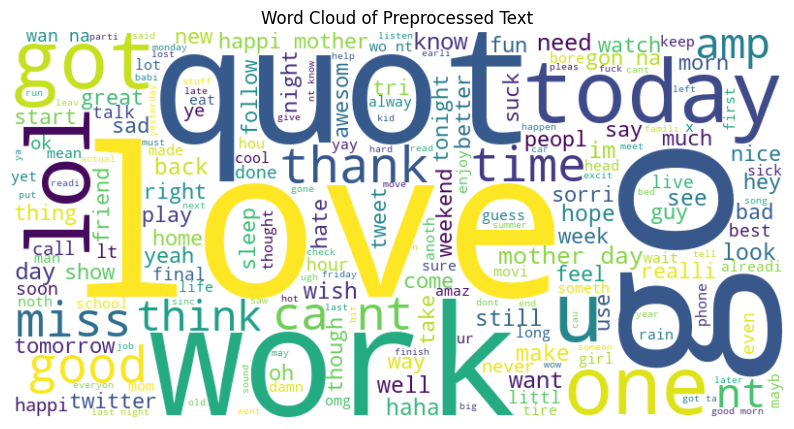

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all preprocessed text into a single string
text = ' '.join(df['content'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Text')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [30]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming `df` and `sentiment` are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the pipeline to a file
joblib.dump(pipeline, r'/Users/zainnofal/Desktop/lab04 hometask/sentiment.joblib')


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.07      0.01      0.02       338
   happiness       0.33      0.36      0.34      1028
        hate       0.51      0.17      0.26       268
        love       0.49      0.38      0.43       762
     neutral       0.34      0.57      0.42      1740
      relief       0.35      0.02      0.04       352
     sadness       0.34      0.25      0.29      1046
    surprise       0.35      0.04      0.08       425
       worry       0.33      0.48      0.39      1666

    accuracy                           0.35      8000
   macro avg       0.24      0.18      0.17      8000
weighted avg       0.33      0.35      0.31      8000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

['/Users/zainnofal/Desktop/lab04 hometask/sentiment.joblib']

BERT MODEL

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.nn.functional import softmax

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# Load the smaller pre-trained BERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:

df = pd.read_csv("tweet_emotions.csv")

# Tokenize the cleaned_content column
tokenized_texts = df['content'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

In [15]:
# Pad sequences to the same length
max_len = max(map(len, tokenized_texts))
padded_sequences = torch.tensor([i + [0]*(max_len-len(i)) for i in tokenized_texts])

In [16]:
# Create attention masks
attention_masks = torch.where(padded_sequences != 0, torch.tensor(1), torch.tensor(0))

# Convert to PyTorch tensors
input_ids = padded_sequences
attention_masks = attention_masks

# Create DataLoader
data = torch.utils.data.TensorDataset(input_ids, attention_masks)
dataloader = DataLoader(data, batch_size=4, shuffle=False)

# Set the model to evaluation mode
model.eval()


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [17]:
# Make predictions
predictions = []

with torch.no_grad():
    for batch in dataloader:
        inputs, masks = batch
        outputs = model(inputs, attention_mask=masks)
        logits = outputs.logits
        probabilities = softmax(logits, dim=1)
        predictions.extend(torch.argmax(probabilities, dim=1).tolist())

# Map predicted labels back to the original sentiment labels
predicted_sentiments = ["positive" if pred == 1 else "negative" for pred in predictions]

In [18]:
# Map predicted labels back to the original sentiment labels
predicted_sentiments = ["positive" if pred == 1 else "negative" for pred in predictions]

# Add the predicted sentiment to the DataFrame
df['predicted_sentiment'] = predicted_sentiments

In [19]:
print(df[['sentiment', 'predicted_sentiment', 'content']])

        sentiment predicted_sentiment  \
0           empty            negative   
1         sadness            positive   
2         sadness            positive   
3      enthusiasm            positive   
4         neutral            positive   
...           ...                 ...   
39995     neutral            positive   
39996        love            positive   
39997        love            positive   
39998   happiness            positive   
39999        love            positive   

                                                 content  
0      @tiffanylue i know  i was listenin to bad habi...  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4      @dannycastillo We want to trade with someone w...  
...                                                  ...  
39995                                   @JohnLloydTaylor  
39996                     Happy Mot

In [21]:
joblib.dump((model, tokenizer), r'/Users/zainnofal/Desktop/lab04 hometask/bert.joblib')

['/Users/zainnofal/Desktop/lab04 hometask/bert.joblib']